In [1]:
# Import necessary libraries
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operation and array handlings
import matplotlib.pyplot as plt  # data visualipytzation
import seaborn as sns  # statistical data visualization
from scipy import stats  # statistical analysis

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Load data from CSV file
df = pd.read_csv("data/health_lifestyle_classification.csv")
df.shape

(100000, 48)

In [2]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [10]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['survey_code', 'age', 'height', 'weight', 'bmi', 'bmi_estimated',
       'bmi_scaled', 'bmi_corrected', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',
       'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake',
       'sugar_intake', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'income', 'meals_per_day', 'electrolyte_level',
       'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'gender_label',
       'mental_health_support_label'],
      dtype='object')
Categorical columns: Index(['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'device_usage', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history',
       'pet_owner', 'target'],
      dtype='object')

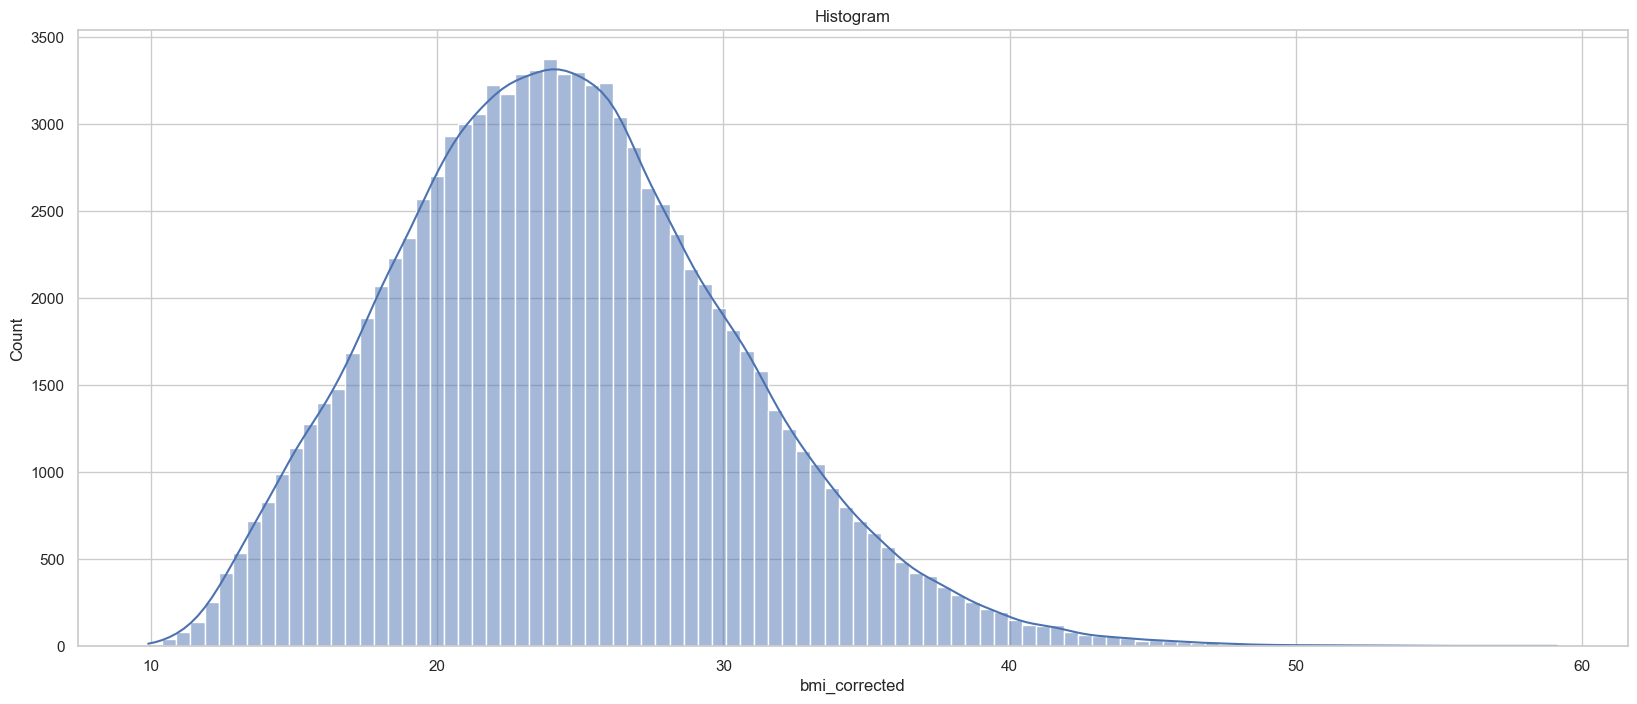

In [11]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df['bmi_corrected'], bins=100, kde=True)
plt.title("Histogram")
plt.show()

In [ ]:
# Categorizes bmi
df['bmi_category'] = pd.cut(
    df['bmi_corrected'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['0-18.4', '18.5-24.8', '24.9-29.8', '29.9+']
)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   survey_code                  100000 non-null  int64   
 1   age                          100000 non-null  int64   
 2   gender                       100000 non-null  object  
 3   height                       100000 non-null  float64 
 4   weight                       100000 non-null  float64 
 5   bmi                          100000 non-null  float64 
 6   bmi_estimated                100000 non-null  float64 
 7   bmi_scaled                   100000 non-null  float64 
 8   bmi_corrected                100000 non-null  float64 
 9   waist_size                   100000 non-null  float64 
 10  blood_pressure               92331 non-null   float64 
 11  heart_rate                   85997 non-null   float64 
 12  cholesterol                  100000 non-null 

In [17]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target,gender_label,mental_health_support_label,bmi_category
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy,1,0,18.5-24.8
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy,0,0,29.9+
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy,1,0,24.9-29.8
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy,0,0,18.5-24.8
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy,0,1,0-18.4


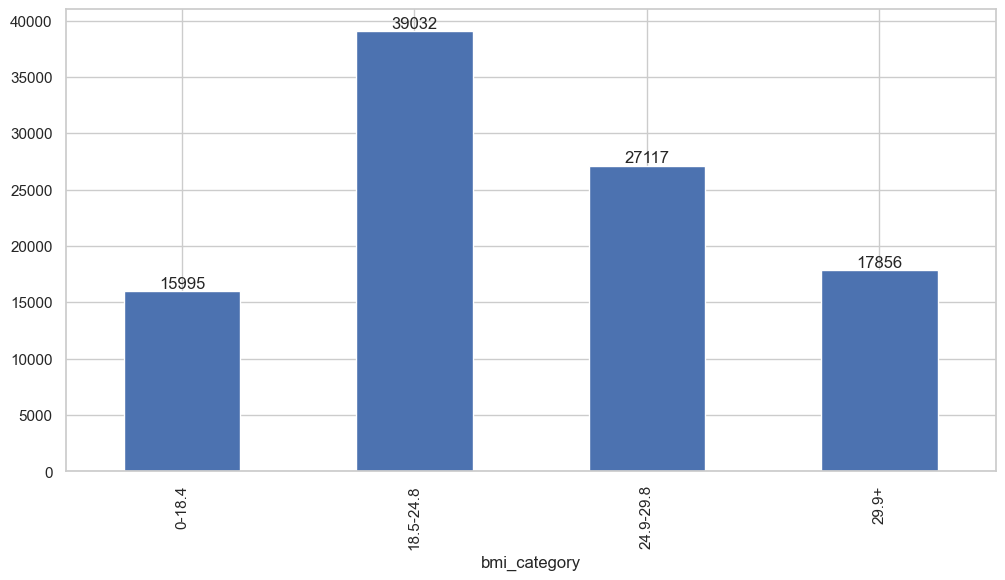

In [18]:
ax = df['bmi_category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_label'] = le.fit_transform(df['gender'])

In [4]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target,gender_label
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy,1
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy,0
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy,1
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy,0
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy,0


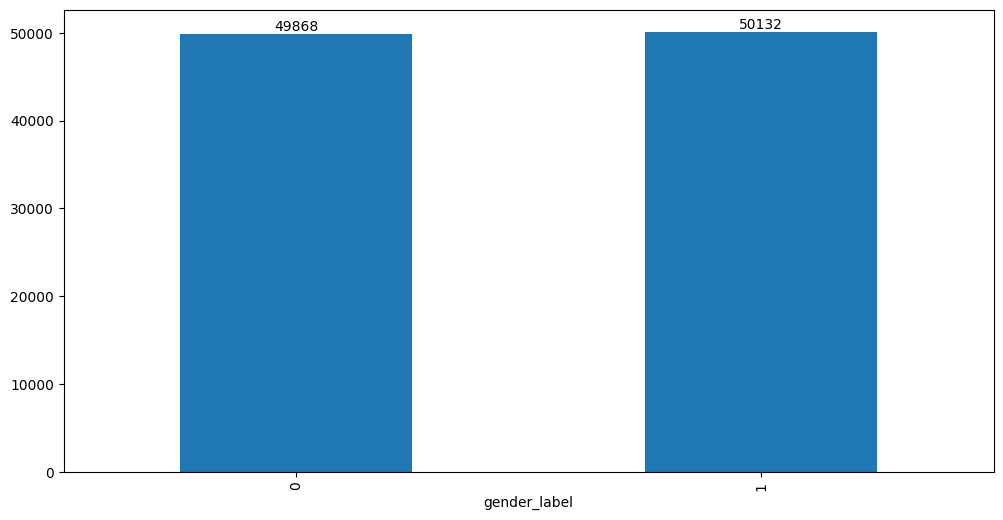

In [5]:
ax = df['gender_label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mental_health_support_label'] = le.fit_transform(df['mental_health_support'])

In [8]:
df.tail()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target,gender_label,mental_health_support_label
99995,99996,53,Male,177.202253,54.303671,17.293811,17.293811,51.881433,17.227616,88.740028,135.090834,75.338212,192.581246,130.804751,17.831593,8.580181,Poor,9.208965,2.016794,8974.813299,1975.933570,58.516664,Regularly,Light,1.885402,8.019683,6,0,No,Bachelor,Office,Teacher,5694.274196,Vegetarian,NaN,Moderate,Poor,No,Moderate,1,High,No,Yes,0,1.0,5.5,3.477124,healthy,1,0
99996,99997,22,Male,180.802297,40.033853,12.246712,12.246712,36.740135,12.159473,103.659560,135.181795,56.334527,216.103598,131.181871,17.805608,8.629343,Excellent,8.776421,1.988679,4302.052523,2028.152923,105.170227,Occasionally,Light,0.500000,1.398681,4,10,No,Bachelor,Service,Driver,5953.298400,Keto,Cardio,High,Moderate,No,Moderate,5,NaN,Yes,No,0,1.0,5.5,1.609656,healthy,1,0
99997,99998,37,Male,185.540653,84.536847,24.556580,24.556580,73.669741,24.172944,98.920422,146.504768,74.864059,178.481690,84.087533,NaN,6.769285,Good,6.788728,2.018741,NaN,1958.958856,52.222350,Regularly,Heavy,0.931263,6.201348,2,3,Yes,PhD,Tech,Driver,4374.490944,Keto,Mixed,Low,Good,Yes,Low,5,NaN,No,No,0,1.0,5.5,-9.736463,healthy,1,1
99998,99999,72,Female,181.796786,56.923335,17.223362,17.223362,51.670087,17.715475,54.559079,100.986759,64.719997,158.981418,83.094321,20.140967,6.723703,Fair,6.383596,5.419878,12127.791539,2161.142582,45.185516,Regularly,Non-smoker,1.278711,5.259159,4,6,Yes,Master,Labor,Artist,4567.470213,Vegetarian,Strength,Low,Poor,Yes,Low,4,High,Yes,Yes,0,1.0,5.5,-4.779376,healthy,0,1
99999,100000,37,Male,175.716378,93.017286,30.125841,30.125841,90.377523,30.254072,70.743851,95.728717,NaN,211.742356,82.268003,11.178592,6.486976,Fair,7.887134,4.980099,6753.150656,2347.057568,51.768190,Regularly,Non-smoker,2.162358,11.741999,9,9,Yes,PhD,Labor,Doctor,1745.477124,Omnivore,Strength,Low,Moderate,No,High,4,Moderate,Yes,No,0,1.0,5.5,-2.010351,diseased,1,1


In [20]:
disease_risk_numerical_df = df[['age', 'height', 'weight', 'bmi_corrected', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',]].copy() 

disease_risk_numerical_df.head()       

,age,height,weight,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours
0,56,173.416872,56.886640,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885
1,69,163.207380,97.799859,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410
2,46,177.281966,80.687562,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164
3,32,172.101255,63.142868,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316
4,60,163.608816,40.000000,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514


In [21]:
disease_risk_numerical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,48.525990,17.886768,18.000000,33.000000,48.000000,64.000000,79.000000
height,100000.0,170.023707,9.982798,140.000000,163.306615,170.016778,176.728920,210.000000
weight,100000.0,70.064862,14.693667,40.000000,59.856938,69.924141,80.027418,139.250894
bmi_corrected,100000.0,24.494140,5.954184,9.893845,20.271059,24.151699,28.247648,59.142646
waist_size,100000.0,84.933043,12.040314,34.093185,76.795185,84.957139,93.018713,133.153631
blood_pressure,92331.0,119.980149,15.015503,59.128168,109.812060,119.951794,130.120621,184.439195
heart_rate,85997.0,74.969177,9.941668,34.745092,68.275432,75.046211,81.685914,114.136041
cholesterol,100000.0,189.966438,29.981934,58.410902,169.667738,190.044579,210.222005,319.875613
glucose,100000.0,99.994538,19.982828,12.434931,86.461401,99.986834,113.508722,183.883548
insulin,84164.0,14.988258,5.002783,-6.794483,11.627114,14.983414,18.361928,35.464749


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to range [0,1]
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaled_data = min_max_scaler.fit_transform(disease_risk_numerical_df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=disease_risk_numerical_df.columns)

In [23]:
min_max_scaled_df.head()

,age,height,weight,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours
0,0.622951,0.477384,0.170141,0.184680,0.384330,0.471914,0.327553,0.597288,0.528282,NaN,0.386209
1,0.836066,0.331534,0.582361,0.540471,0.519942,0.469151,0.399524,0.219468,0.609338,0.400530,0.603157
2,0.459016,0.532600,0.409947,0.318659,0.567349,0.510295,0.520187,0.304913,0.447629,NaN,0.300240
3,0.229508,0.458589,0.233175,0.229107,0.670409,0.710594,0.428725,0.553063,0.676243,0.604073,0.243146
4,0.688525,0.337269,0.000000,0.100519,0.352592,0.730064,0.725401,0.543100,0.480484,0.540312,0.545835


In [24]:
min_max_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,0.500426,0.293226,0.0,0.245902,0.491803,0.754098,1.0
height,100000.0,0.428910,0.142611,0.0,0.332952,0.428811,0.524699,1.0
weight,100000.0,0.302918,0.148046,0.0,0.200068,0.301500,0.403295,1.0
bmi_corrected,100000.0,0.296460,0.120900,0.0,0.210710,0.289507,0.372675,1.0
waist_size,100000.0,0.513221,0.121545,0.0,0.431070,0.513464,0.594844,1.0
blood_pressure,92331.0,0.485608,0.119826,0.0,0.404465,0.485381,0.566530,1.0
heart_rate,85997.0,0.506658,0.125224,0.0,0.422345,0.507629,0.591262,1.0
cholesterol,100000.0,0.503148,0.114669,0.0,0.425514,0.503447,0.580618,1.0
glucose,100000.0,0.510705,0.116553,0.0,0.431771,0.510660,0.589528,1.0
insulin,84164.0,0.515455,0.118383,0.0,0.435919,0.515341,0.595288,1.0
